In [35]:
import pandas as pd
import plotly.express as px
from biomet import df
import plotly.graph_objects as go
df

Bia_diam  Bii_diam  Bit_diam  Chest_depth  Chest  Elbow  Wrist  Knee  \
0        42.9      26.0      31.5         17.7   28.0   13.1   10.4  18.8   
1        43.7      28.5      33.5         16.9   30.8   14.0   11.8  20.6   
2        40.1      28.2      33.3         20.9   31.7   13.9   10.9  19.7   
3        44.3      29.9      34.0         18.4   28.2   13.9   11.2  20.9   
4        42.5      29.9      34.0         21.5   29.4   15.2   11.6  20.7   
..        ...       ...       ...          ...    ...    ...    ...   ...   
502      38.0      30.4      32.9         17.0   27.1   12.9   10.4  19.5   
503      35.3      28.7      30.4         17.7   25.6   12.4    9.8  17.3   
504      34.7      24.9      24.7         17.3   24.2   12.0   10.2  18.0   
505      38.5      29.0      32.9         15.3   25.6   12.0    9.8  18.6   
506      35.6      29.0      29.0         20.4   26.8   13.4   10.8  18.7   

     Ankle  Shoulder  ...  Wrist_min_girth  Age  Weight  Height  Gender_M_F  \
0     14.1     106.2  ...             16.5   21    65.6   174.0           1   
1     15.1     110.5  ...             17.0   23    71.8   175.3           1   
2     14.1     115.1  ...             16.9   28    80.7   193.5           1   
3     15.0     104.5  ...             16.6   23    72.6   186.5           1   
4     14.9     107.5  ...             18.0   22    78.8   187.2           1   
..     ...       ...  ...              ...  ...     ...     ...         ...   
502   14.4     108.4  ...             15.4   29    71.8   176.5           0   
503   13.6      99.3  ...             15.2   21    55.5   164.4           0   
504   13.6      91.9  ...             15.5   33    48.6   160.7           0   
505   13.3     107.1  ...             15.5   33    66.4   174.0           0   
506   13.8     100.5  ...             16.4   38    67.3   163.8           0   

           IMC      g  Groupe_Age  moyenne_Diff_1  moyenne_Diff_2  
0    21.667327  Homme       18-22        9.094872       11.084615  
1    23.364722  Homme       23-27        9.094872       11.084615  
2    21.553192  Homme       28-32        9.094872       11.084615  
3    20.872715  Homme       23-27        9.094872       11.084615  
4    22.486120  Homme       18-22        9.094872       11.084615  
..         ...    ...         ...             ...             ...  
502  23.048094  Femme       28-32        9.094872       11.084615  
503  20.534747  Femme       18-22        9.094872       11.084615  
504  18.819346  Femme       33-37        9.094872       11.084615  
505  21.931563  Femme       33-37        9.094872       11.084615  
506  25.083450  Femme       38-42        9.094872       11.084615  

[507 rows x 30 columns]

# Question 1 :

In [12]:
# Question 1 : 
df['Gender_M_F'] = df['Gender_M_F'].astype(int)
df['g'] = df['Gender_M_F'].map({1: 'Homme', 0: 'Femme'})
fig = px.pie(df, names='g', title='Répartition hommes-femme')
fig.show() 

# Question 2 :

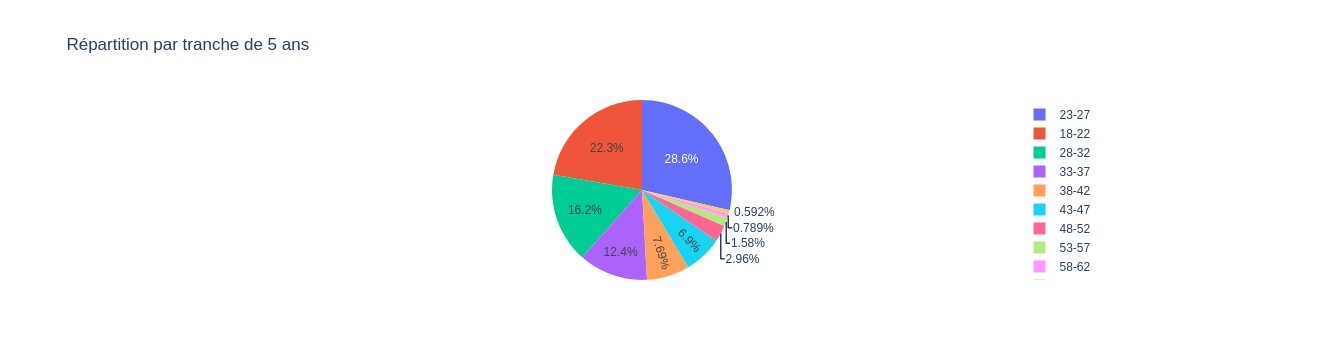

In [13]:
# Question 2 :
df['Age'] = df['Age'].round().astype(int)
max_age = df['Age'].max()
min_age = df['Age'].min()
bins = list(range(min_age, max_age + 6, 5))  
labels = [f"{i}-{i+4}" for i in range(min_age, max_age, 5)]  
df['Groupe_Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_counts = df['Groupe_Age'].value_counts()
fig = px.pie(names=age_counts.index, values=age_counts.values, title='Répartition par tranche de 5 ans')
fig.show()

# Question 3 :# Question 

In [14]:
# Question 3 :
df['Age'] = df['Age'].round().astype(int)
bins = list(range(df['Age'].min(), df['Age'].max() + 6, 5)) 
labels = [f"{i}-{i+4}" for i in range(df['Age'].min(), df['Age'].max(), 5)] 
df['Groupe_Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Hommes = df[df['Gender_M_F'] == 1]
Femmes = df[df['Gender_M_F'] == 0]

Nombre_hommes_par_age = Hommes['Groupe_Age'].value_counts()
Nombre_femmes_par_age = Femmes['Groupe_Age'].value_counts()

fig = px.pie(names=Nombre_hommes_par_age.index, values=Nombre_hommes_par_age.values, title='Répartition Hommes par tranche de 5 ans')
fig.show()

fig = px.pie(names=Nombre_femmes_par_age.index, values=Nombre_femmes_par_age.values, title='Répartition Femmes par tranche de 5 ans')
fig.show()

# Question 4 :

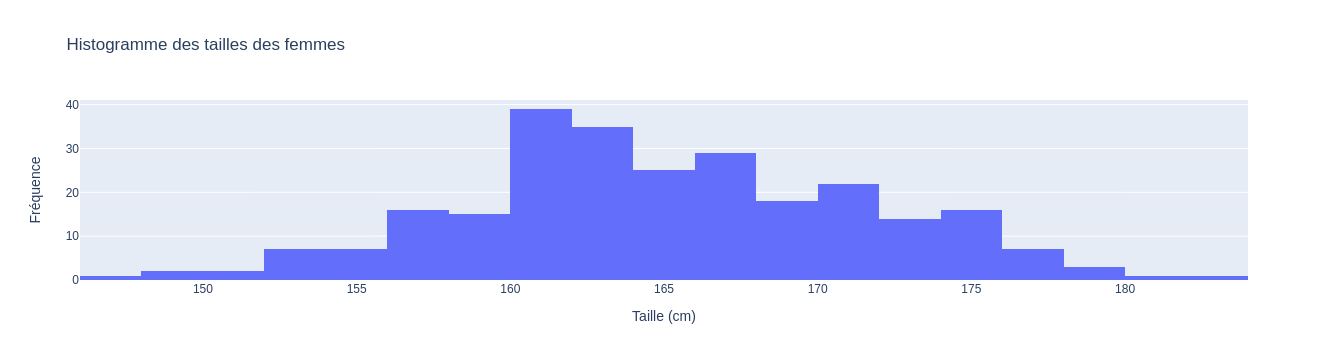

In [15]:
# Question 4 :
# Merci à Jacques et Nico pour l'aide sur les arrondis.
fig = px.histogram(Femmes, x='Height', title='Histogramme des tailles des femmes')
fig.update_layout(xaxis_title='Taille (cm)', yaxis_title='Fréquence')
fig.show()

# Question 5 :

In [16]:
# Question 5 :
fig = px.histogram(Hommes, x='Height', title='Histogramme des tailles des hommes')
fig.update_layout(xaxis_title='Taille (cm)', yaxis_title='Fréquence')
fig.show()

# Question 6 :

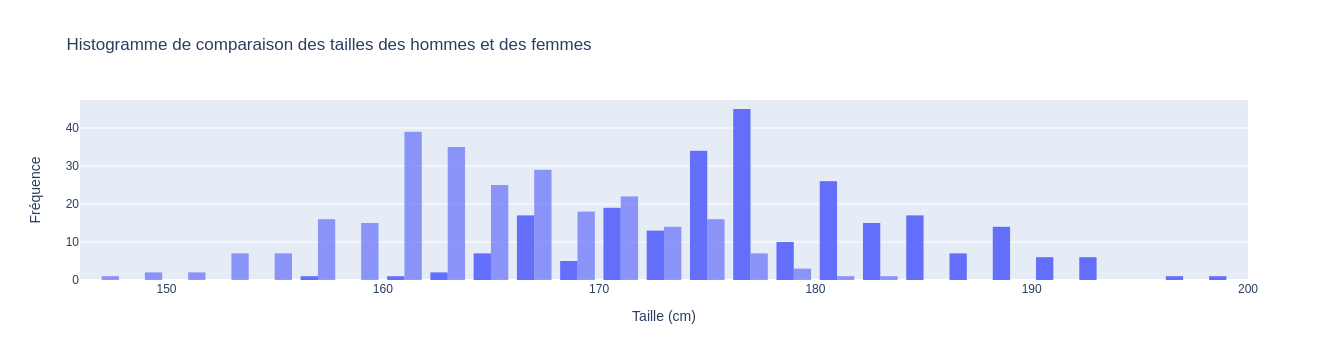

In [56]:
# Question 6 :
fig = px.histogram(Hommes, x='Height', barmode='group', title='Histogramme de comparaison des tailles des hommes et des femmes')
fig.update_layout(xaxis_title='Taille (cm)', yaxis_title='Fréquence')
fig.add_traces(px.histogram(Femmes, x='Height', barmode='group').update_traces(opacity=0.7, marker_color='red').data[0])
fig.show()

# Question 7 : 

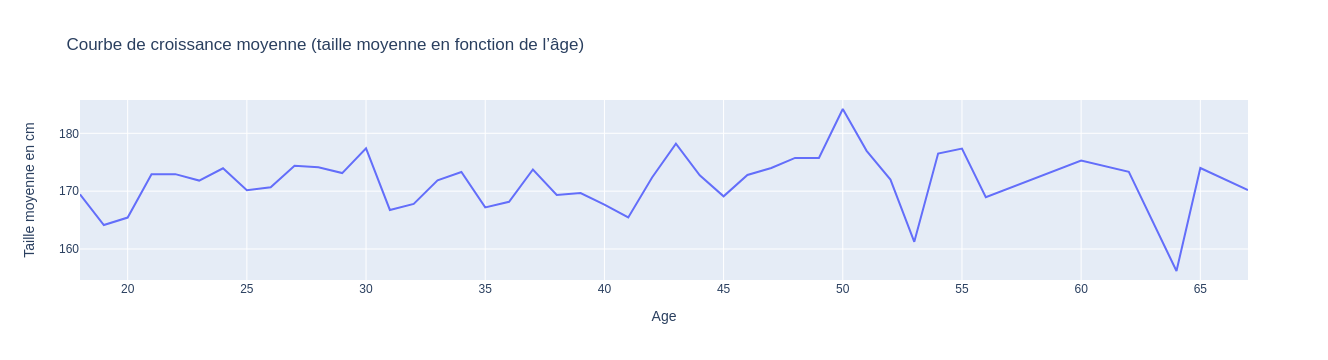

In [18]:
# Question 7 :
taille_moyenne_par_age = df.groupby('Age')['Height'].mean().reset_index()
taille_moyenne_par_age.columns = ['Age', 'Taille moyenne en cm']
fig = px.line(taille_moyenne_par_age, x='Age', y='Taille moyenne en cm', title='Courbe de croissance moyenne (taille moyenne en fonction de l’âge)')
fig.show()

# Question 8 :

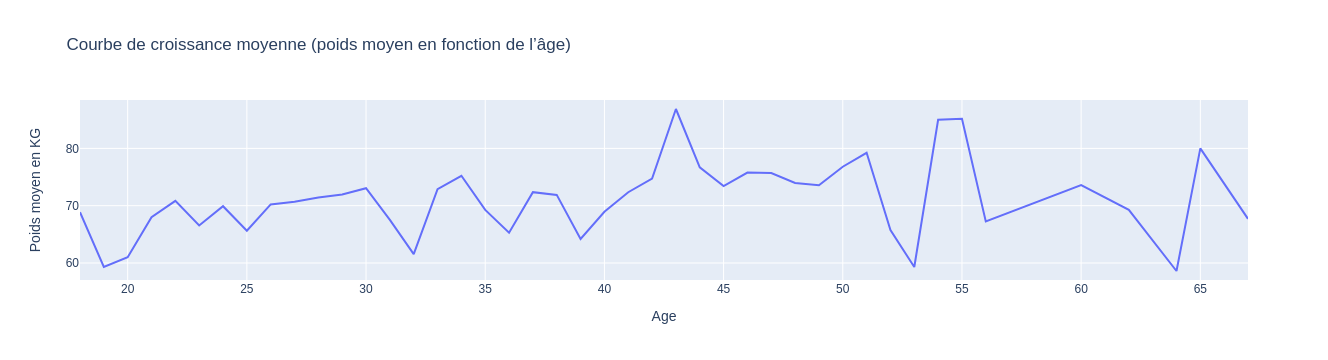

In [19]:
# Question 8 :
poids_moyen_par_age = df.groupby('Age')['Weight'].mean().reset_index()
poids_moyen_par_age.columns = ['Age', 'Poids moyen en KG']
fig = px.line(poids_moyen_par_age, x='Age', y='Poids moyen en KG', title='Courbe de croissance moyenne (poids moyen en fonction de l’âge)')
fig.show()

# Question 8 b :

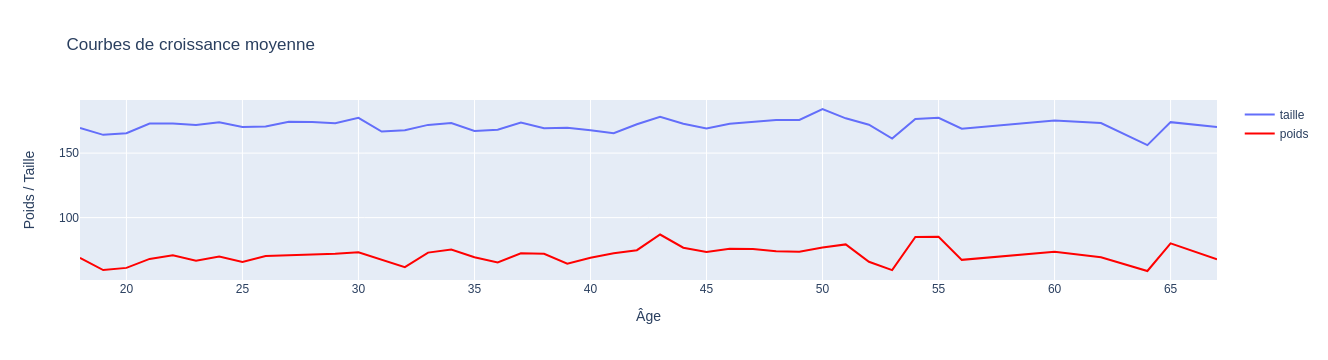

In [21]:
# Question 8 b :
# mon binôme fait du bon travail !
fig = px.line(taille_moyenne_par_age, x='Age', y='Taille moyenne en cm', title='Courbes de croissance moyenne')
fig.update_traces(showlegend=True, name='taille')
l2 = px.line(poids_moyen_par_age, x='Age', y='Poids moyen en KG').update_traces(line_color="red", showlegend=True, name="poids")
fig.add_traces(l2.data[0])
fig.update_layout(xaxis_title='Âge', yaxis_title='Poids / Taille')
fig.show()

# Question 9 :

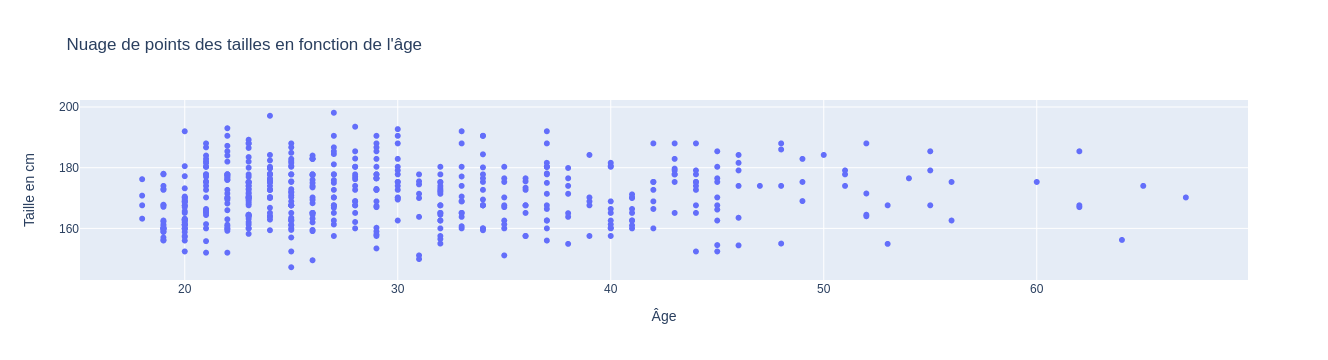

In [22]:
# Question 9 :
taille_fonction_age = df.groupby('Age')['Height']
taille_fonction_age.columns = ['Age', 'Taille en cm']
fig = px.scatter(df, x='Age', y='Height', title="Nuage de points des tailles en fonction de l'âge")
fig.update_layout(xaxis_title='Âge', yaxis_title='Taille en cm')
fig.show()

# Question 10 :

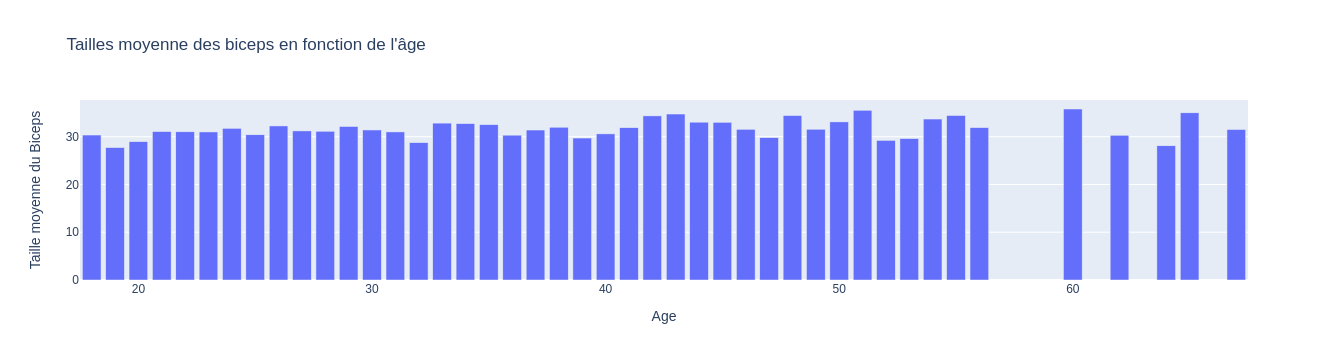

In [23]:
# Question 10 :
taille_moyenne_biceps_par_age = df.groupby('Age')['Bicep'].mean().reset_index()
fig = px.bar(taille_moyenne_biceps_par_age, x='Age', y='Bicep', title="Tailles moyenne des biceps en fonction de l'âge", 
                   labels={'Age': "Age", 'Bicep': "Taille moyenne du Biceps"})
fig.update_layout(xaxis_title='Age', yaxis_title='Taille moyenne du Biceps')
fig.show()

# Question 11 a : 

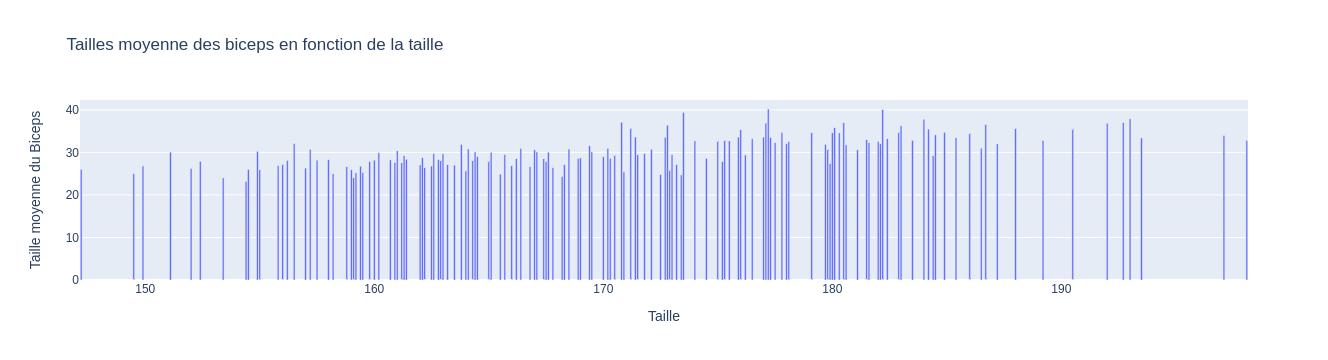

In [53]:
# Question 11 a :
taille_moyenne_biceps_par_taille = df.groupby('Height')['Bicep'].mean().reset_index()
fig = px.bar(taille_moyenne_biceps_par_taille, x='Height', y='Bicep', 
             title="Tailles moyenne des biceps en fonction de la taille",
             labels={'Height': "Taille", 'Bicep': "Taille moyenne du Biceps"})
fig.update_layout(xaxis_title='Taille', yaxis_title='Taille moyenne du Biceps')
fig.show()

# Question 11 b :

/tmp/ipykernel_3683/652842500.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



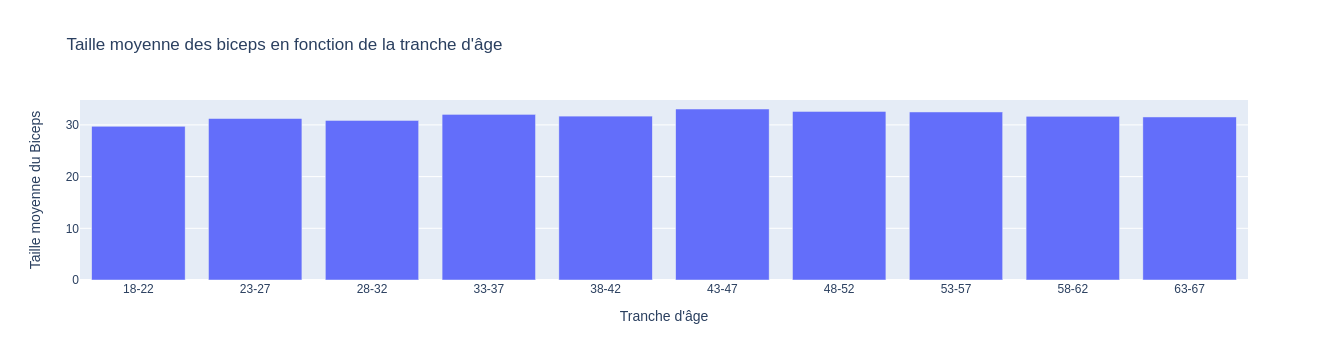

In [54]:
# Question 11 b :
moyenne_biceps_par_age = df.groupby('Age_Group')['Bicep'].mean().reset_index()

fig = px.bar(moyenne_biceps_par_age, x='Age_Group', y='Bicep', 
             title="Taille moyenne des biceps en fonction de la tranche d'âge",
             labels={'Age_Group': "Tranche d'âge", 'Bicep': "Taille moyenne du Biceps"})

fig.update_layout(xaxis_title='Tranche d\'âge', yaxis_title='Taille moyenne du Biceps')
fig.show()

# Question 12 :

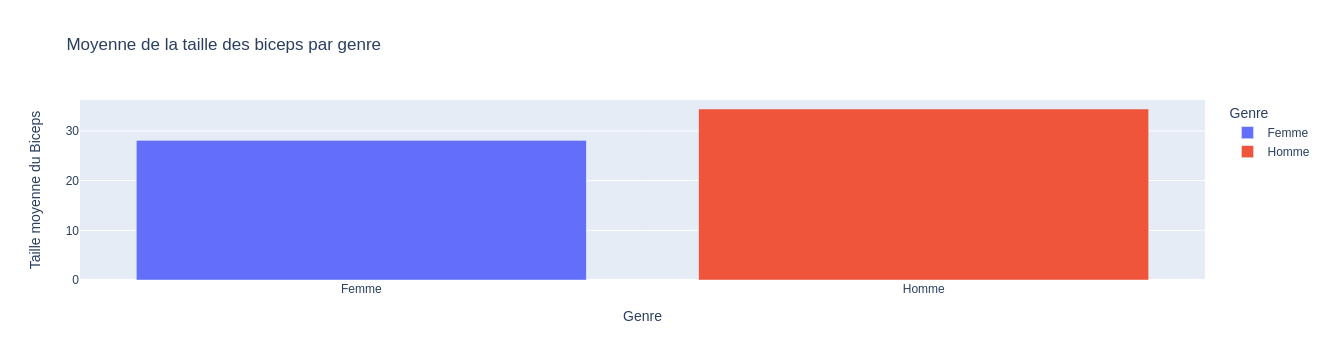

In [25]:
# Question 12 : 
df['Gender_M_F'] = df['Gender_M_F'].astype(int)
df['g'] = df['Gender_M_F'].map({1: 'Homme', 0: 'Femme'})
moyenne_biceps_par_genre = df.groupby('g')['Bicep'].mean().reset_index()
fig = px.bar(moyenne_biceps_par_genre, x='g', y='Bicep', 
             title="Moyenne de la taille des biceps par genre",
             labels={'g': "Genre", 'Bicep': "Taille moyenne du Biceps"},
             color='g')
fig.update_layout(xaxis_title='Genre', yaxis_title='Taille moyenne du Biceps')
fig.show()

# Question 13 : 

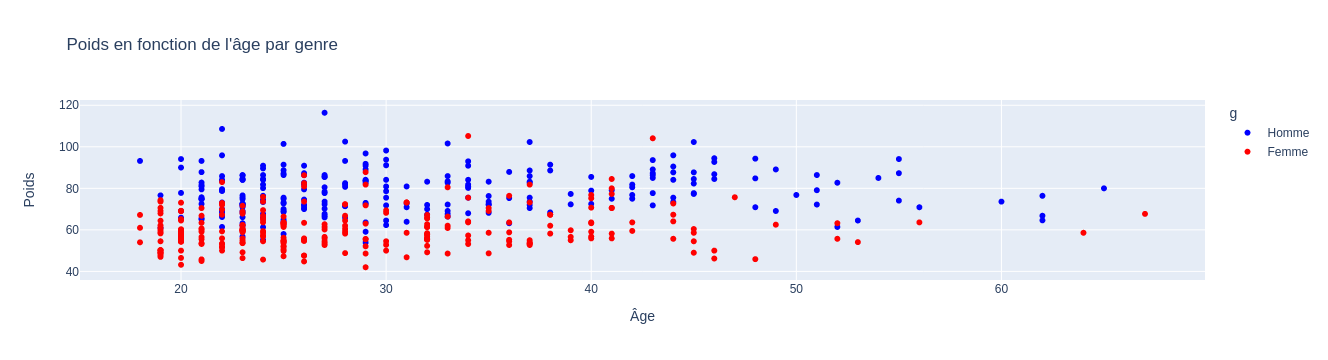

In [26]:
# Question 13 :
df['Gender_M_F'] = df['Gender_M_F'].astype(int)
df['g'] = df['Gender_M_F'].map({1: 'Homme', 0: 'Femme'})
fig = px.scatter(df, x='Age', y='Weight', color='g',
                 title="Poids en fonction de l'âge par genre",
                 labels={'Age': 'Âge', 'Weight': 'Poids'},
                 color_discrete_map={'Homme': 'blue', 'Femme': 'red'})
fig.update_layout(xaxis_title='Âge', yaxis_title='Poids')
fig.show()

# Question 14 a :

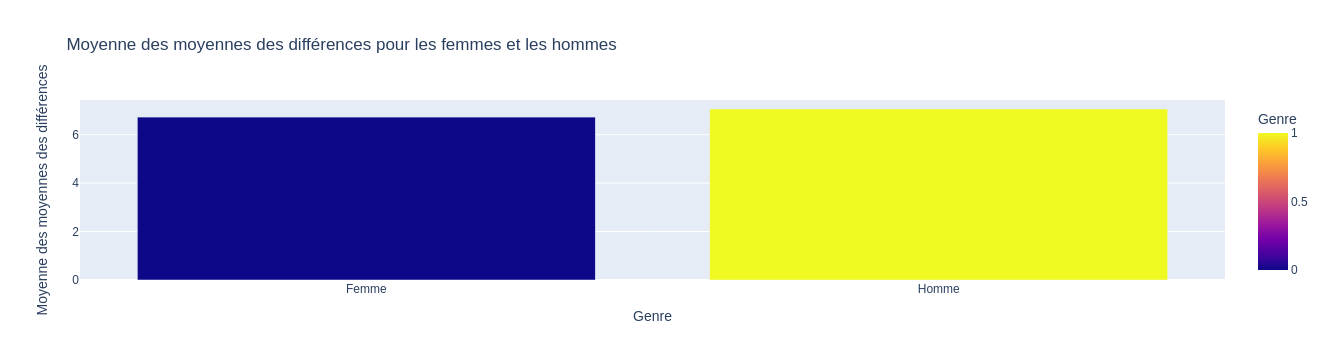

In [31]:
# Question 14 a :
diff_1 = abs(df['Waist'] - df['Navel'])
diff_2 = abs(df['Navel'] - df['Hip'])

df['moyenne_Diff_1'] = diff_1.mean()
df['moyenne_Diff_2'] = diff_2.mean()

moyenne_des_diff_par_genre = df.groupby('Gender_M_F')[['moyenne_Diff_1', 'moyenne_Diff_2']].mean().reset_index()
moyenne_des_diff_par_genre['moyenne_des_moyenne_des_diff'] = moyenne_des_diff_par_genre.mean(axis=1)

fig = px.bar(moyenne_des_diff_par_genre, x='Gender_M_F', y='moyenne_des_moyenne_des_diff', 
             title="Moyenne des moyennes des différences pour les femmes et les hommes",
             labels={'Gender_M_F': 'Genre', 'moyenne_des_moyenne_des_diff': 'Moyenne des moyennes des différences'},
             color='Gender_M_F', 
             color_discrete_map={1: 'blue', 0: 'red'},
             category_orders={'Gender_M_F': [0, 1]})

fig.update_layout(xaxis={'tickvals': [0, 1], 'ticktext': ['Femme', 'Homme']},
                  xaxis_title='Genre', yaxis_title='Moyenne des moyennes des différences')
fig.show()

# Question 14 b :

In [32]:
# Question 14 b :
diff_1 = abs(df['Waist'] - df['Navel'])
diff_2 = abs(df['Navel'] - df['Hip'])

df['moyenne_Diff_1'] = diff_1.mean()
df['moyenne_Diff_2'] = diff_2.mean()

moyenne_moyenne_par_genre = df.groupby('Gender_M_F')[['moyenne_Diff_1', 'moyenne_Diff_2']].mean().reset_index()
moyenne_moyenne_par_genre['moyenne_de_moyenne_de_la_diff'] = moyenne_moyenne_par_genre.mean(axis=1)

fig = px.histogram(moyenne_moyenne_par_genre, x='Gender_M_F', y='moyenne_de_moyenne_de_la_diff', 
                   title="Moyenne des moyennes des différences pour les femmes et les hommes",
                   labels={'Gender_M_F': 'Genre', 'moyenne_de_moyenne_de_la_diff': 'Moyenne des moyennes des différences'},
                   color='Gender_M_F',
                   color_discrete_map={1: 'blue', 0: 'red'},
                   category_orders={'Gender_M_F': [0, 1]},
                   barmode='group')
fig.update_layout(xaxis={'tickvals': [0, 1], 'ticktext': ['Femme', 'Homme']},
                  xaxis_title='Genre', yaxis_title='Moyenne des moyennes des différences')
fig.show()

# Question 15 :

# Que peut on conclure des informations de la question 12 ?
## Les informations de la question 12 : 
### Moyenne de la taille des biceps par genre. 
### Le genre des personnes influe sur la taille moyenne des biceps. 
### Les hommes ont tendance à avoir une taille moyenne des biceps plus grande que celle des femmes.

# Question 16 : 

# Est-ce que la taille des genoux 'Knee' est proportionnelle à la taille 'Height' ?
## oui, se référer au diagramme ci-après.

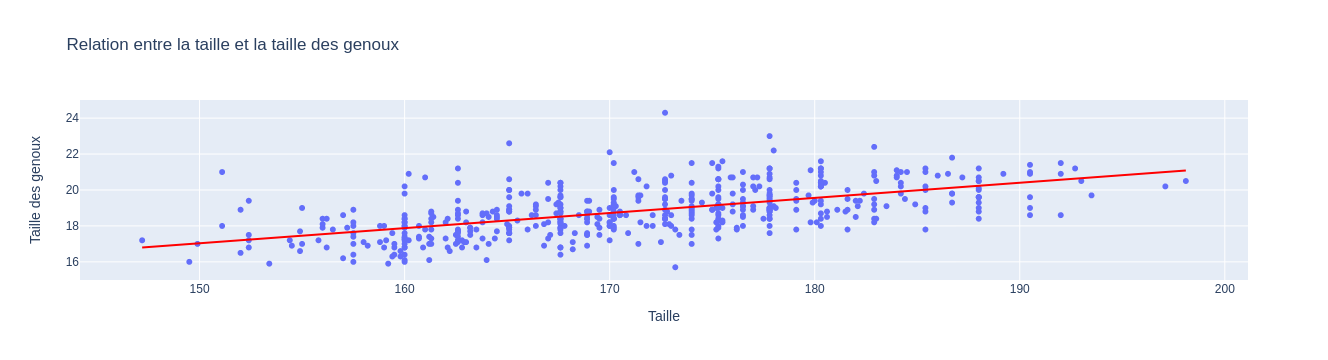

In [43]:
# Question 16 :
# Est-ce que la taille des genoux 'Knee' est proportionnelle à la taille 'Height' ? Créer un diagramme qui démontre votre réponse
fig = px.scatter(df, x='Height', y='Knee', 
                 title="Relation entre la taille et la taille des genoux",
                 labels={'Height': 'Taille', 'Knee': 'Taille des genoux'},
                 trendline="ols",
                 trendline_color_override="red"
                )
fig.update_layout(xaxis_title='Taille', yaxis_title='Taille des genoux')
fig.show()

# Question 17 :

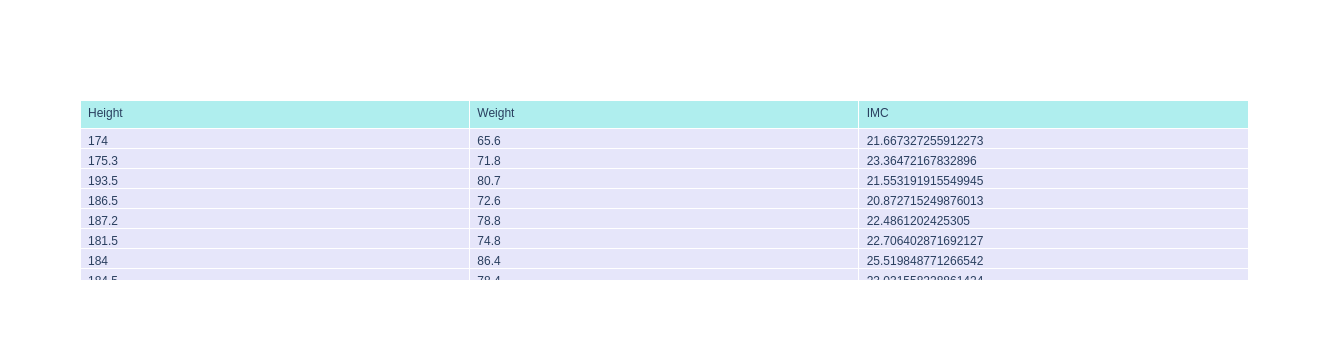

In [36]:
# Question 17 :
df['IMC'] = df['Weight'] / ((df['Height'] / 100) ** 2)
filtered_df = df[df['IMC'] > 20][['Height', 'Weight', 'IMC']]
fig = go.Figure(data=[go.Table(
    header=dict(values=list(filtered_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[filtered_df[col] for col in filtered_df.columns],
               fill_color='lavender',
               align='left'))
])
fig.show()

# Question 18 : 

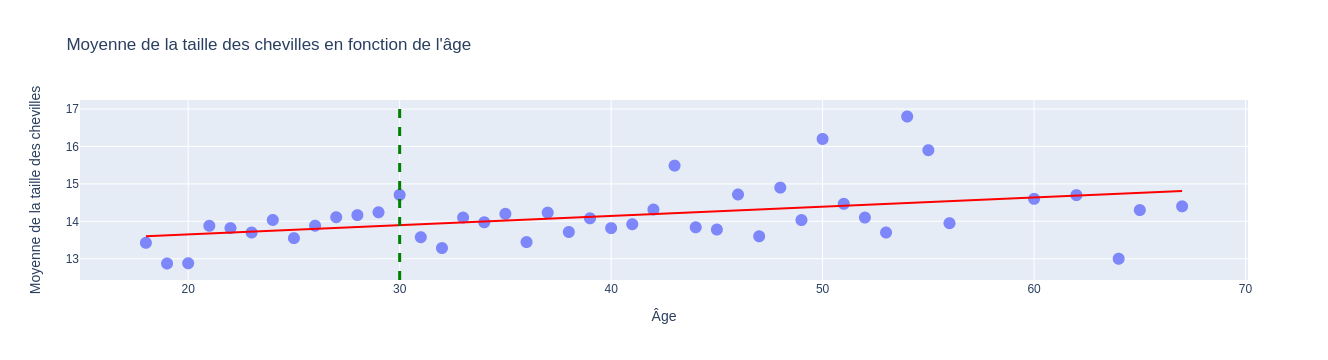

In [37]:
# Question 18 :
# Est-ce que les personnes de plus de 30 ans ont de plus grosses chevilles que les autres ? Faire une moyenne avec le code ci-dessous et créer un diagramme qui démontre votre réponse
df
grouped_data = df.groupby('Age')['Ankle'].agg(['count', 'mean']).reset_index()

moins_egal_30 = grouped_data[grouped_data['Age'] <= 30]
plus_30 = grouped_data[grouped_data['Age'] > 30]

fig = px.scatter(grouped_data, x='Age', y='mean',
                 title="Moyenne de la taille des chevilles en fonction de l'âge",
                 labels={'Age': 'Âge', 'mean': 'Moyenne de la taille des chevilles'},
                 trendline="ols",  
                 trendline_color_override="red"  
                 )
fig.add_vline(x=30, line_width=3, line_dash="dash", line_color="green")
fig.update_traces(marker=dict(size=12, opacity=0.8),
                  selector=dict(mode='markers'))
fig.show()

# Est-ce que les personnes de plus de 30 ans ont de plus grosses chevilles que les autres ?
## oui, il suffit de se réfèrer au diagram au dessus. 
#### La ligne rouge représente la moyenne de la taille des chevilles, par rapport à l'âge et nous voyons bien que cette ligen augmente avec le temps qui passe
#### La ligne verticale verte est positionnée sur le 30, pour délimiter les personnes au dessus de 30 ans, la partie qui nous intéresse est donc la partie de droite.

# Question 19 :

In [38]:
# Question 19 :
df['IMC'] = df['Weight'] / ((df['Height'] / 100) ** 2)
fig = px.scatter(df, x='IMC', y='Ankle',
                 title="Relation entre l'IMC et la taille des chevilles",
                 labels={'IMC': 'IMC', 'Ankle': 'Taille des chevilles'},
                 trendline="ols",  
                 trendline_color_override="red"
                 )
fig.add_vline(x=20, line_width=3, line_dash="dash", line_color="green")
fig.update_traces(marker=dict(size=12, opacity=0.8),
                  selector=dict(mode='markers'))

fig.show()

# Est-ce que les personnes qui ont un IMC > 20 ont de plus grosses chevilles que les autres ?
## Oui, il suffit de se référer au diagramme ci-dessus.
### La ligne rouge représente, la taille des chevilles par rappport à l'IMC, nous pouvons donc voir que cette ligne augmente.
### La ligne verte indique l'IMC de 20.

# Question 20 :

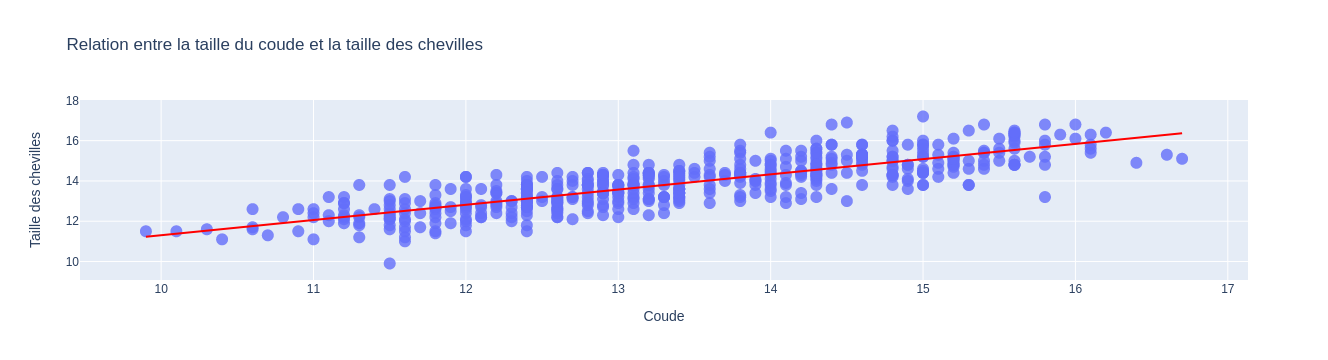

In [39]:
# Question 20 :
fig = px.scatter(df, x='Elbow', y='Ankle',
                 title="Relation entre la taille du coude et la taille des chevilles",
                 labels={'Elbow': 'Coude', 'Ankle': 'Taille des chevilles'},
                 trendline="ols",  
                 trendline_color_override="red"
                 )
fig.update_traces(marker=dict(size=12, opacity=0.8),
                  selector=dict(mode='markers'))

fig.show()

# La taille du coude est-elle liée à la taille de la cheville ? 
## Oui, il suffit de se référer au diagramme ci-dessus.
### La ligne rouge représente, la taille des chevilles par rappport à la taille des chevilles, nous pouvons donc voir que cette ligne augmente.